**DS103 Python Refresher** | Kate Alexandra R. Fabro | Group 5

# **Section 1: Machine Learning Methods**

*Instructions*
* Methods 1-5: line by line run through of the code given on the link


**1.1 Classfication**

source: https://scikit-learn.org/stable/modules/svm.html#classification

In [1]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [2]:
# Based on the learned decision boundary, the model will predict the most likely class (0 or 1)
clf.predict([[2., 2.]])

array([1])

In [3]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [4]:
# get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [5]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

***1.1.1 Multi-class classification***

* decision_function_shape='ovo': The one-vs-one (ovo) strategy builds binary classifiers for each pair of classes. With 4 classes, the number of binary classifiers is 6 (calculated as 4 choose 2, or 4*(4-1)/2).
* dec.shape[1] = 6: This shows that there are 6 decision scores, one for each pair of classes when using the ovo strategy.
* decision_function_shape='ovr': The one-vs-rest (ovr) strategy builds a classifier for each class, comparing it to all other classes. With 4 classes, you have 4 classifiers.
* dec.shape[1] = 4: This indicates that with the ovr strategy, the decision function returns one score per class, leading to 4 decision scores.

In [6]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)
dec = clf.decision_function([[1]])
dec.shape[1] # 6 classes: 4*3/2 = 6
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

* LinearSVC: A linear version of the Support Vector Classifier that is more efficient for large datasets with a linear decision boundary.
* fit(X, Y): Trains the model on the input data X and the class labels Y.
* decision_function([[1]]): Outputs the decision score for the input [1], representing the distance of the input from the decision boundary for each class.
* dec.shape[1]: Returns the number of decision scores, which is equal to the number of classes in the model.

In [7]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)
dec = lin_clf.decision_function([[1]])
dec.shape[1]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


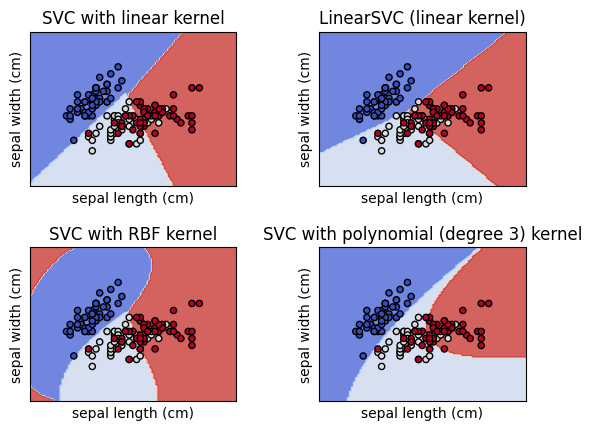

In [8]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

***1.1.2 Scores and probabilities***

The `decision_function` method of SVC and NuSVC provides per-class scores for each sample (or a single score for binary classification). If the probability option is set to `True` during initialization, it enables class membership probability estimates via the `predict_proba` and `predict_log_proba` methods. In binary classification, probabilities are calibrated using Platt scaling, which involves fitting a logistic regression model to the SVM scores through additional cross-validation on the training data.


For example: **Tie-breaking** is computationally expensive when `decision_function_shape='ovr'`, so it is disabled by default. This example demonstrates the impact of the break_ties parameter in a multiclass classification problem with `decision_function_shape='ovr'`.

The two plots only differ in the central region where class ties occur. If `break_ties=False`, all inputs in that region are assigned to one class. However, with `break_ties=True`, the tie-breaking mechanism produces a non-convex decision boundary in the tied area.

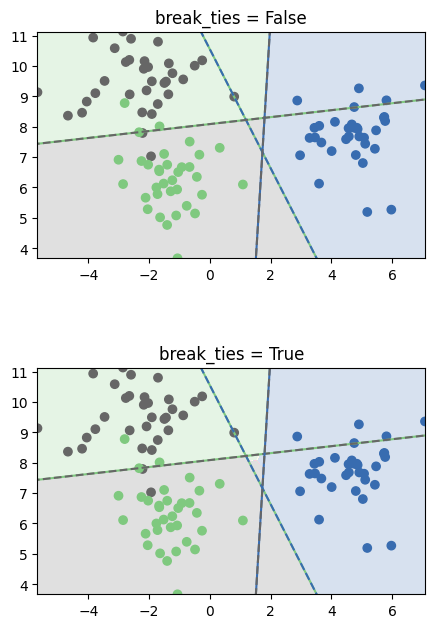

In [9]:
# Code source: Andreas Mueller, Adrin Jalali
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(random_state=27)

fig, sub = plt.subplots(2, 1, figsize=(5, 8))
titles = ("break_ties = False", "break_ties = True")

for break_ties, title, ax in zip((False, True), titles, sub.flatten()):
    svm = SVC(
        kernel="linear", C=1, break_ties=break_ties, decision_function_shape="ovr"
    ).fit(X, y)

    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]

    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = np.linspace(ylim[0], ylim[1], 1000)
    xx, yy = np.meshgrid(xs, ys)

    pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    colors = [plt.cm.Accent(i) for i in [0, 4, 7]]

    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
    classes = [(0, 1), (0, 2), (1, 2)]
    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    ax.imshow(
        -pred.reshape(xx.shape),
        cmap="Accent",
        alpha=0.2,
        extent=(xlim[0], xlim[1], ylim[1], ylim[0]),
    )

    for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
        line2 = -(line * coef[1] + intercept) / coef[0]
        ax.plot(line2, line, "-", c=colors[col[0]])
        ax.plot(line2, line, "--", c=colors[col[1]])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_aspect("equal")

plt.show()

***1.1.3 Unbalanced problems***

In cases where assigning greater importance to specific classes or individual samples is needed, the parameters class_weight and sample_weight can be utilized.

The class_weight parameter is implemented in the fit method of SVC (but not NuSVC). This parameter is a dictionary in the format `{class_label: value}`, where value is a positive floating-point number that scales the parameter C for the given class_label by a factor of C * value. The figure below demonstrates how the decision boundary of an imbalanced problem changes with and without weight adjustment.

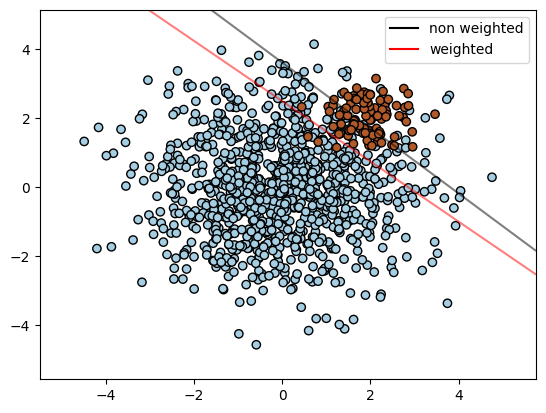

In [10]:
# SVM: Separating hyperplane for unbalanced classes

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [
        mlines.Line2D([], [], color="k", label="non weighted"),
        mlines.Line2D([], [], color="r", label="weighted"),
    ],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

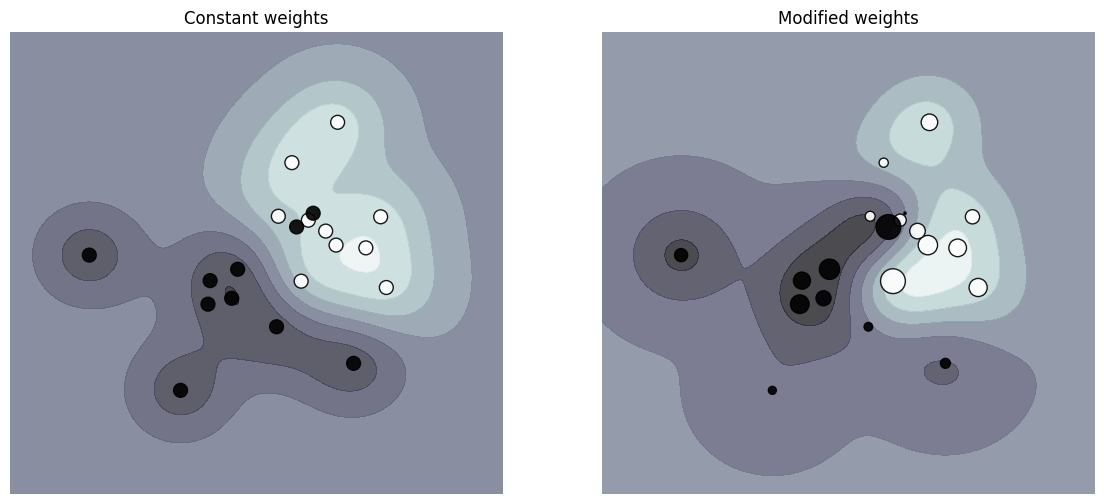

In [11]:
# SVM: Weighted samples

import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

**1.2 Regression**

sources:
1. https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

2. https://scikit-learn.org/stable/modules/svm.html#regression

***1.2.1 Decision Tree Regression***

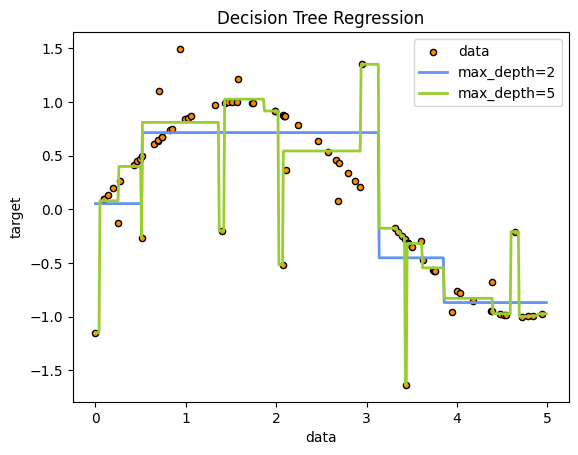

In [12]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

***1.2.2 Support Vector Regression (Supplementary)***

In [13]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)
regr.predict([[1, 1]])

array([1.5])

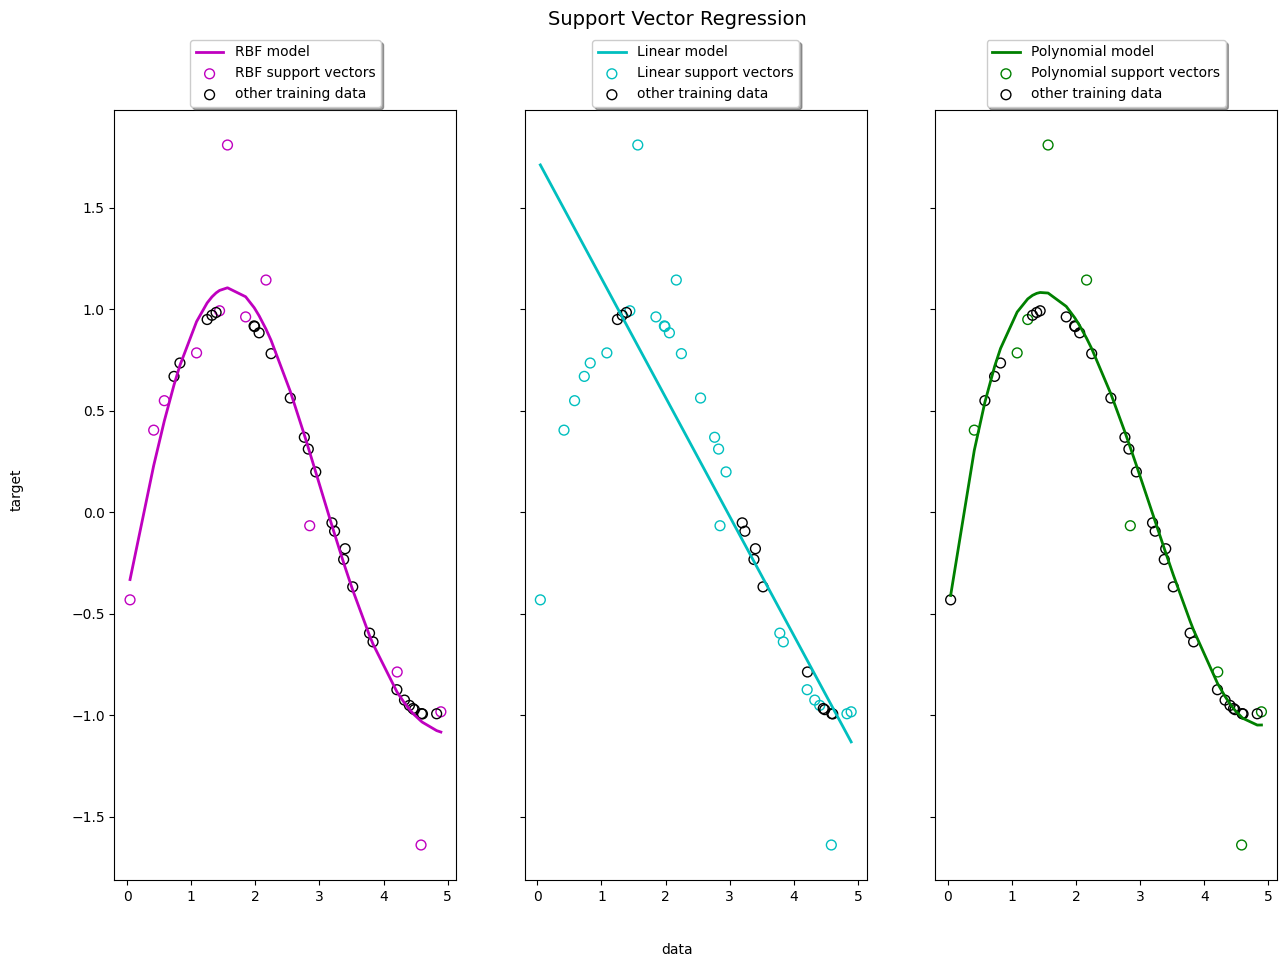

In [14]:
# Support Vector Regression (SVR) using linear and non-linear kernels

import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR

X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit Regression Model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# Results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

**1.3 Dimensionality Reduction**

source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py

***1.3.1 Kernel PCA***

In [ ]:
# This example shows the difference between the Principal Components Analysis (PCA) and its kernelized version
# Authors: Mathieu Blondel, Andreas Mueller, Guillaume Lemaitre
# License: BSD 3 clause

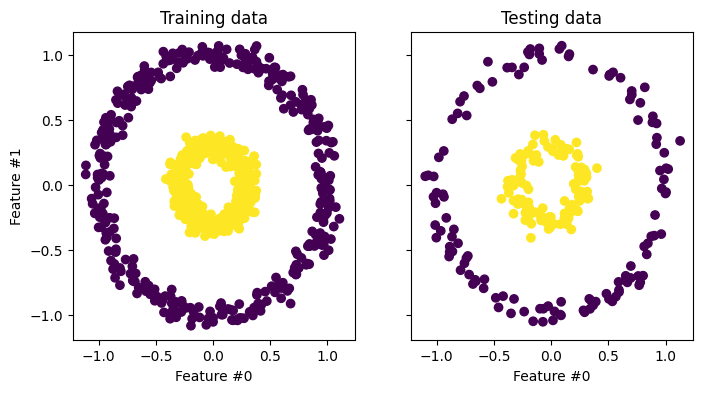

In [15]:
# Projecting data: PCA vs. KernelPCA
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

The samples from each class cannot be linearly separated: there is no straight line that can split the samples of the inner set from the outer set.

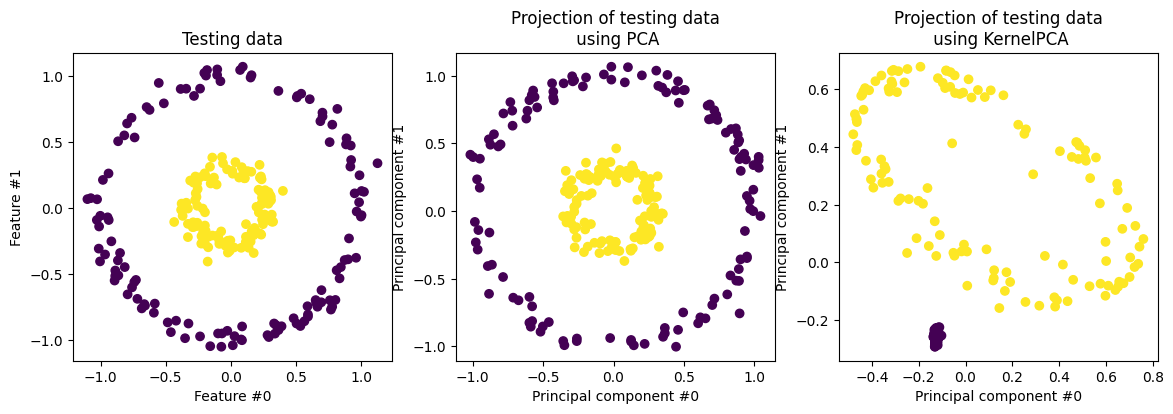

In [16]:
# PCA with and without a kernel

from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

PCA performs a linear transformation on the data by centering, rescaling, and rotating it based on variance, resulting in isotropic data that aligns with its principal components. In PCA projections, as shown, there's no change in scaling, and while the data are rotated, they remain isotropic, which limits the effectiveness of linear classifiers for distinguishing classes.

In contrast, using an RBF kernel enables non-linear projection. This method unfolds the dataset while approximately preserving the distances between nearby points. The figure on the right illustrates this: samples of the same class become closer to each other, separating the classes and allowing for effective use of a linear classifier.

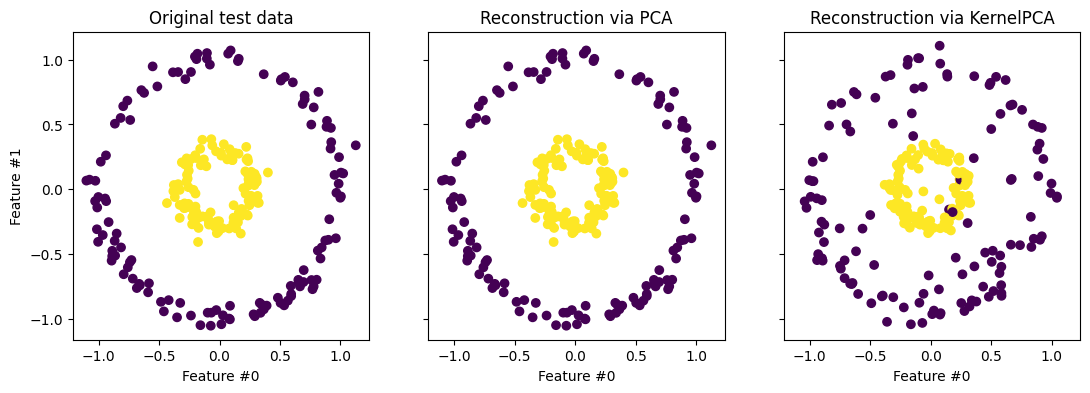

In [17]:
# Projecting into the original feature space

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

PCA provides a perfect reconstruction, but KernelPCA does not. Unlike PCA, KernelPCA cannot perform exact inverse transformation due to the lack of an analytical back-projection. Instead, it uses KernelRidge to approximate the mapping from the kernelized PCA basis to the original feature space, resulting in minor differences in reconstruction.

To enhance reconstruction accuracy with KernelPCA, you can adjust the regularization parameter, alpha, which controls how much the mapping relies on the training data.

**1.4 Model Selection**

source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

***1.4.1 Demonstration of multi-metric evaluation on cross_val_score and GridSearchCV***

A search using multiple metric parameters can be performed by setting the scoring parameter to either a list of metric scorer names or a dictionary mapping scorer names to their corresponding scorer functions.

The results from all scorers are available in the cv_results_ dictionary, with keys ending in '`_<scorer_name>`' (e.g., '`mean_test_precision`', '`rank_test_precision`').

The `best_estimator_`, `best_index_`, `best_score_`, and `best_params_` attributes correspond to the scorer specified in the refit attribute.

In [18]:
# Author: Raghav RV <rvraghav93@gmail.com>
# License: BSD

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Running GridSearchCV using multiple evaluation metrics

X, y = make_hastie_10_2(n_samples=8000, random_state=42)

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_

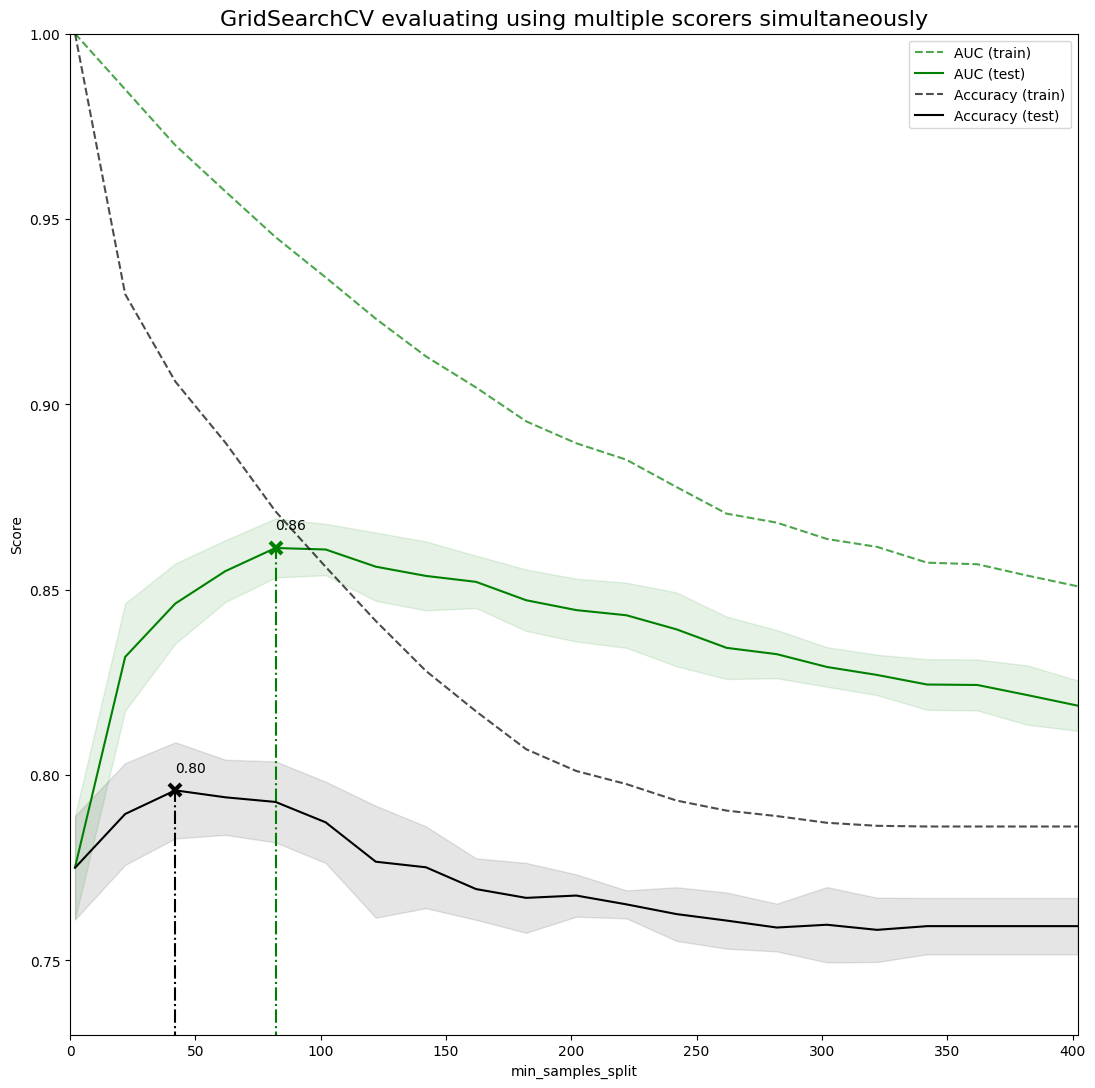

In [20]:
# Plotting the result

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()



**1.5 Preprocessing**

source: https://scikit-learn.org/stable/modules/preprocessing.html

***1.5.1 Standardization, or mean removal and variance scaling***

**Standardizing** datasets is often essential for many scikit-learn **machine learning estimators**, which perform best when features resemble standard normally distributed data with **zero mean and unit variance**.

In practice, it's common to center the data by subtracting the mean and scale it by dividing non-constant features by their standard deviation. This is important because certain algorithms, such as those using the RBF kernel in Support Vector Machines or l1/l2 regularizers in linear models, assume features are centered and have similar variances. Features with significantly different variances can dominate the objective function, impairing the estimator's ability to learn effectively from other features.

In [21]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

scaler.mean_

scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Scaled data has zero mean and unit variance:

In [23]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [22]:
X_scaled.std(axis=0)

array([1., 1., 1.])

This class implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later re-apply the same transformation on the testing set. This class is hence suitable for use in the early steps of a Pipeline:

In [24]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

***1.5.1.1 Scaling features to a range***


Another approach to standardization is scaling features to fall within a specified range, typically between zero and one, or adjusting them so that the maximum absolute value of each feature equals one. This can be done using MinMaxScaler or MaxAbsScaler, respectively.

This type of scaling is useful for addressing very small standard deviations of features and maintaining zero entries in sparse datasets.








In [25]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data:

In [26]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

It is possible to introspect the scaler attributes to find about the exact nature of the transformation learned on the training data:

In [27]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [28]:
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

`MaxAbsScaler` works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [29]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs
max_abs_scaler.scale_

array([2., 1., 2.])

***1.5.2 Non-linear transformation***

There are two main types of transformations: **quantile** and **power transforms**. Both maintain the rank order of values within each feature through monotonic transformations.

**Quantile** transforms adjust features to follow a desired distribution by applying a formula that uses the feature's cumulative distribution function and the quantile function of the target distribution. This method smooths out unusual distributions and is less sensitive to outliers compared to scaling methods, though it can distort correlations and distances.

**Power transforms**, on the other hand, are parametric methods designed to make data distributions resemble a Gaussian distribution.

***1.5.2.1 Mapping to a Uniform distribution***

QuantileTransformer provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


array([4.3, 5.1, 5.8, 6.5, 7.9])

This feature corresponds to the sepal length in cm. Once the quantile transformation applied, those landmarks approach closely the percentiles previously defined:



In [31]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])


array([0.        , 0.23873874, 0.50900901, 0.74324324, 1.        ])

This can be confirmed on a independent testing set with similar remarks:

In [32]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [33]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([0.01351351, 0.25      , 0.47747748, 0.60472973, 0.94144144])

***1.5.2.2 Mapping to a Gaussian distribution***

Examples of Box-Cox and Yeo-Johnson transformations applied to different probability distributions. While these power transforms can make some distributions appear very Gaussian-like, they may be ineffective for others. This underscores the importance of visualizing the data before and after transformation.

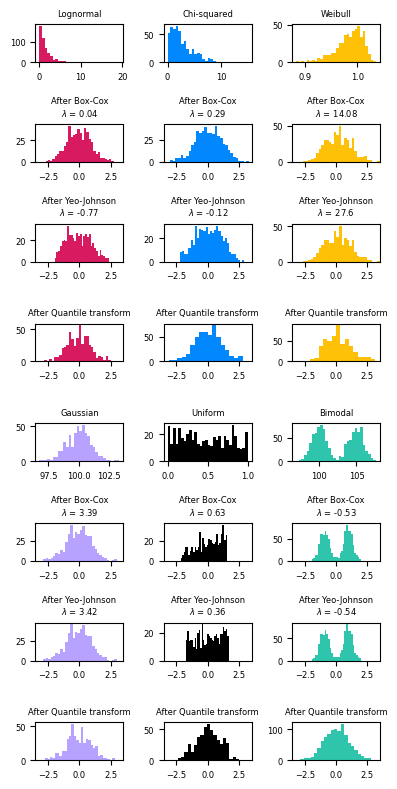

In [34]:
# Author: Eric Chang <ericchang2017@u.northwestern.edu>
#         Nicolas Hug <contact@nicolas-hug.com>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

***1.5.3 Normalization***

Normalization involves scaling individual samples to have unit norm. This is particularly useful when using quadratic forms, such as dot-products or other kernels, to measure the similarity between pairs of samples. This principle underlies the Vector Space Model, commonly employed in text classification and clustering tasks.








The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the l1, l2, or max norms:

In [35]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [36]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer()

The normalizer instance can then be used on sample vectors as any transformer:

In [37]:
normalizer.transform(X)

normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

***1.5.4 Encoding categorical features***

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1):

In [39]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])
enc.fit(X)

OrdinalEncoder()

By default, OrdinalEncoder will also passthrough missing values that are indicated by np.nan.



In [41]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [42]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

Relevant Pipeline:

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
enc = Pipeline(steps=[
    ("encoder", preprocessing.OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="constant", fill_value=-1)),
])
enc.fit_transform(X)
enc.fit(X)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('imputer', SimpleImputer(fill_value=-1, strategy='constant'))])

Another possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K, also known as one-hot or dummy encoding. This type of encoding can be obtained with the OneHotEncoder, which transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

In [46]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [47]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

It is possible to specify this explicitly using the parameter categories. There are two genders, four possible continents and four web browsers in our dataset:

In [48]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
# Note that for there are missing categorical values for the 2nd and 3rd
# feature
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()
enc.fit(X)

OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])

If the training data might have missing categorical features, using `handle_unknown='infrequent_if_exist`' is often preferable to manual category settings. With this option, unknown categories during transformation won't raise an error; instead, the one-hot encoded columns will be all zeros or treated as infrequent, if enabled. Note that this option is supported only for one-hot encoding.








In [50]:
enc = preprocessing.OneHotEncoder(handle_unknown='infrequent_if_exist')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

It is also possible to encode each column into n_categories - 1 columns instead of n_categories columns by using the drop parameter. This parameter allows the user to specify a category for each feature to be dropped. This is useful to avoid co-linearity in the input matrix in some classifiers.

In [51]:
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_
drop_enc.transform(X).toarray()

array([[1., 1., 1.],
       [0., 0., 0.]])

One might want to drop one of the two columns only for features with 2 categories. In this case, you can set the parameter drop='if_binary'.

In [52]:
X = [['male', 'US', 'Safari'],
     ['female', 'Europe', 'Firefox'],
     ['female', 'Asia', 'Chrome']]
drop_enc = preprocessing.OneHotEncoder(drop='if_binary').fit(X)
drop_enc.categories_
drop_enc.transform(X).toarray()

array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0.]])

When handle_unknown='ignore' and drop is not None, unknown categories will be encoded as all zeros:

In [53]:
drop_enc = preprocessing.OneHotEncoder(drop='first',
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
drop_enc.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0., 0.]])

All the categories in X_test are unknown during transform and will be mapped to all zeros. This means that unknown categories will have the same mapping as the dropped category. OneHotEncoder.inverse_transform will map all zeros to the dropped category if a category is dropped and None if a category is not dropped:

In [54]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False,
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
X_trans = drop_enc.transform(X_test)
X_trans
drop_enc.inverse_transform(X_trans)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([['female', None, None]], dtype=object)

Support of categorical features with missing values - OneHotEncoder supports categorical features with missing values by considering the missing values as an additional category:

In [58]:
X = [['male', 'Safari'],
     ['female', None],
     [np.nan, 'Firefox']]
enc = preprocessing.OneHotEncoder(handle_unknown='error').fit(X)
enc.categories_
enc.transform(X).toarray()

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]])

If a feature contains both np.nan and None, they will be considered separate categories:

In [59]:
X = [['Safari'], [None], [np.nan], ['Firefox']]
enc = preprocessing.OneHotEncoder(handle_unknown='error').fit(X)
enc.categories_
enc.transform(X).toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

***1.5.4.1 Infrequent Categories ***

The OneHotEncoder and OrdinalEncoder can aggregate infrequent categories into a single output per feature using min_frequency and max_categories parameters.

* **min_frequency** can be an integer (≥1) or a float (0.0–1.0). An integer sets a threshold for the minimum category count, while a float represents a fraction of the total samples. The default is 1, meaning all categories are encoded separately.
* **max_categories** can be None or an integer (>1). It limits the number of output features, including the one for aggregated infrequent categories.

The following categories 'dog' and 'snake' are considered infrequent:

X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +

In [60]:
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +
              ['snake'] * 3], dtype=object).T
enc = preprocessing.OrdinalEncoder(min_frequency=6).fit(X)
enc.infrequent_categories_
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[2.],
       [0.],
       [1.],
       [2.]])

The `OrdinalEncoder`'s `max_categories` does not account for missing or unknown categories. Setting unknown_value or `encoded_missing_value` to an integer adds up to two extra unique integer codes, potentially resulting in up to `max_categories` + 2 codes. For example, "a" and "d" are grouped as one category, "b" and "c" remain separate, with unknown values encoded as 3 and missing values as 4.

In [61]:
X_train = np.array(
    [["a"] * 5 + ["b"] * 20 + ["c"] * 10 + ["d"] * 3 + [np.nan]],
    dtype=object).T
enc = preprocessing.OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=3,
    max_categories=3, encoded_missing_value=4)
_ = enc.fit(X_train)
X_test = np.array([["a"], ["b"], ["c"], ["d"], ["e"], [np.nan]], dtype=object)
enc.transform(X_test)

array([[2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.]])

Similarity, OneHotEncoder can be configured to group together infrequent categories:

In [64]:
enc = preprocessing.OneHotEncoder(min_frequency=6, sparse_output=False).fit(X)
enc.infrequent_categories_
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

By setting handle_unknown to 'infrequent_if_exist', unknown categories will be considered infrequent:



In [65]:
enc = preprocessing.OneHotEncoder(
   handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=6)
enc = enc.fit(X)
enc.transform(np.array([['dragon']]))

array([[0., 0., 1.]])

OneHotEncoder.get_feature_names_out uses ‘infrequent’ as the infrequent feature name:

In [66]:
enc.get_feature_names_out()

array(['x0_cat', 'x0_rabbit', 'x0_infrequent_sklearn'], dtype=object)

Infrequent categories can also be configured using max_categories. In the following example, we set max_categories=2 to limit the number of features in the output. This will result in all but the 'cat' category to be considered infrequent, leading to two features, one for 'cat' and one for infrequent categories - which are all the others:

In [67]:
enc = preprocessing.OneHotEncoder(max_categories=2, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

If both `max_categories` and `min_frequency` are non-default values, then categories are selected based on min_frequency first and max_categories categories are kept. In the following example, min_frequency=4 considers only snake to be infrequent, but max_categories=3, forces dog to also be infrequent:

In [68]:
enc = preprocessing.OneHotEncoder(min_frequency=4, max_categories=3, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

If there are infrequent categories with the same cardinality at the cutoff of max_categories, then then the first max_categories are taken based on lexicon ordering. In the following example, “b”, “c”, and “d”, have the same cardinality and with max_categories=2, “b” and “c” are infrequent because they have a higher lexicon order.

In [69]:
X = np.asarray([["a"] * 20 + ["b"] * 10 + ["c"] * 10 + ["d"] * 10], dtype=object).T
enc = preprocessing.OneHotEncoder(max_categories=3).fit(X)
enc.infrequent_categories_

[array(['b', 'c'], dtype=object)]

***1.5.5 Discretization***

**Discretization**, or binning, partitions continuous features into discrete values. It can convert continuous attributes into nominal ones, making the dataset easier to interpret. One-hot encoding discretized features enhances model expressiveness and interpretability, and can add nonlinearity to linear models. For more advanced options, such as smooth transformations, refer to Generating polynomial features.








***1.5.5.1 K-bins discretization***

In [70]:
# KBinsDiscretizer discretizes features into k bins:

X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [71]:
# Based on these bin intervals, X is transformed as follows:

est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

`KBinsDiscretizer` implements different binning strategies, which can be selected with the strategy parameter. The ‘uniform’ strategy uses constant-width bins. The ‘quantile’ strategy uses the quantiles values to have equally populated bins in each feature. The ‘kmeans’ strategy defines bins based on a k-means clustering procedure performed on each feature independently.**bold text**

In [72]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']
transformer = preprocessing.FunctionTransformer(
    pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
)
X = np.array([0.2, 2, 15, 25, 97])
transformer.fit_transform(X)

['infant', 'kid', 'teen', 'adult', 'senior citizen']
Categories (5, object): ['infant' < 'kid' < 'teen' < 'adult' < 'senior citizen']

***1.5.5.2 Feature binarization***

The process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate **Bernoulli distribution**. For instance, this is the case for the `BernoulliRBM`.

In [74]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)
binarizer

binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [75]:
# Can adjust normalizer

binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

***1.5.6 Imputation of missing values***

Real-world datasets often contain missing values, represented as blanks, NaNs, or other placeholders, which are incompatible with scikit-learn estimators that require complete numerical data. A basic approach is to discard rows or columns with missing values, but this results in lost data. A better strategy is to impute missing values, inferring them from the existing data.








***1.5.6.1 Univariate vs. Multivariate Imputation***

* Univariate - imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. SimpleImputer).
*  Multivariate - use the entire set of available feature dimensions to estimate the missing values (e.g. IterativeImputer).

In [76]:
# Univariate SimpleImputer

import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [77]:
# The SimpleImputer class also supports sparse matrices:

import scipy.sparse as sp
X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])
imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit(X)
X_test = sp.csc_matrix([[-1, 2], [6, -1], [7, 6]])
print(imp.transform(X_test).toarray())

[[3. 2.]
 [6. 3.]
 [7. 6.]]


In [78]:
# The SimpleImputer class also supports categorical data represented as string values or pandas categoricals when using the 'most_frequent' or 'constant' strategy:

import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


In [79]:
# Multivariate IterativeImputer

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


***1.5.6.2 Nearest neighbors imputationNearest neighbors imputation***

The `KNNImputer` class fills missing values using the k-Nearest Neighbors method. It uses the `nan_euclidean_distances` metric to find nearest neighbors and imputes missing features based on values from `n_neighbors` closest neighbors, either averaging or weighting by distance. For samples with multiple missing features, different neighbors may be used for each feature. If fewer neighbors are available than specified and no distances are defined, the feature’s training set average is used. If at least one neighbor’s distance is defined, their weighted or unweighted average is applied.








In [80]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

**1.5.6.3 Keeping the number of features constant**

In [81]:
imputer = SimpleImputer()
X = np.array([[np.nan, 1], [np.nan, 2], [np.nan, 3]])
imputer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([[1.],
       [2.],
       [3.]])

In [82]:
imputer.set_params(keep_empty_features=True)
imputer.fit_transform(X)

array([[0., 1.],
       [0., 2.],
       [0., 3.]])

***1.5.6.4 Marking imputed values***

The `MissingIndicator` transformer creates a binary matrix indicating missing values in the dataset, which can be useful alongside imputation to retain information about missing data. Both `SimpleImputer` and `IterativeImputer` have an add_indicator parameter (default is False) that, when set to True, combines the indicator matrix with the imputed data.

While NaN is commonly used for missing values, it requires the data type to be float. The `missing_values` parameter allows specifying other placeholders, such as integers; for example, -1 can be used as a missing value.

In [83]:
from sklearn.impute import MissingIndicator
X = np.array([[-1, -1, 1, 3],
              [4, -1, 0, -1],
              [8, -1, 1, 0]])
indicator = MissingIndicator(missing_values=-1)
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True, False]])

In [84]:
indicator.features_

array([0, 1, 3])

In [85]:
indicator = MissingIndicator(missing_values=-1, features="all")
mask_all = indicator.fit_transform(X)
mask_all
indicator.features_

array([0, 1, 2, 3])

***1.5.7 Generating polynomial features***

Often it’s useful to add complexity to a model by considering nonlinear features of the input data. We show two possibilities that are both based on polynomials: The first one uses pure polynomials, the second one uses splines, i.e. piecewise polynomials.


***1.5.7.1 Polynomial features***

In [86]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [87]:
X = np.arange(9).reshape(3, 3)
X
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

***1.5.7.2 Spline transformer***

**Splines** are piecewise polynomials, parametrized by their polynomial degree and the positions of the knots. The SplineTransformer implements a B-spline basis,

In [88]:
import numpy as np
from sklearn.preprocessing import SplineTransformer
X = np.arange(5).reshape(5, 1)
X
spline = SplineTransformer(degree=2, n_knots=3)
spline.fit_transform(X)

array([[0.5  , 0.5  , 0.   , 0.   ],
       [0.125, 0.75 , 0.125, 0.   ],
       [0.   , 0.5  , 0.5  , 0.   ],
       [0.   , 0.125, 0.75 , 0.125],
       [0.   , 0.   , 0.5  , 0.5  ]])

***1.5.8 Custom transformers***

Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing. You can implement a transformer from an arbitrary function with FunctionTransformer. For example, to build a transformer that applies a log transformation in a pipeline, do:



In [90]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

You can ensure that `func` and `inverse_func` are the inverse of each other by setting `check_inverse=True` and calling fit before transform. Please note that a warning is raised and can be turned into an error with a `filterwarnings`:

In [91]:
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",
                        category=UserWarning, append=False)


# **Section 2: Methods Modification**

*Instructions*:
* loading of synthetic dataset or kaggle dataset
* running of preprocessing and classification/regression code from section 1 using the specs i assigned per team
  * Methods: Preprocessing & Classification
  * Color Pallete: https://colorhunt.co/palette/10a19d540375ff7000ffbf00
  * n_samples: 300
  * random seed number: 37

***Preliminaries***

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import preprocessing

import plotly.express as px
import plotly.graph_objects as go

In [93]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [94]:
datasets_folder = Path('/gdrive/MyDrive/datasets/')

Dataset can be downloaded from this gdrive: https://drive.google.com/file/d/1pUe7psPaKJ60Smk-EEVqIV3o1ElKU4mw/view?usp=sharing

In [95]:
loan_dta = pd.read_csv(datasets_folder/'train_u6lujuX_CVtuZ9i (1).csv')
loan_dta.head(300)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,LP001949,Male,Yes,3+,Graduate,NaN,4416,1250.0,110.0,360.0,1.0,Urban,Y
296,LP001953,Male,Yes,1,Graduate,No,6875,0.0,200.0,360.0,1.0,Semiurban,Y
297,LP001954,Female,Yes,1,Graduate,No,4666,0.0,135.0,360.0,1.0,Urban,Y
298,LP001955,Female,No,0,Graduate,No,5000,2541.0,151.0,480.0,1.0,Rural,N


**Task 1: Preprocessing**

In [96]:
print("DataFrame shape:", loan_dta.shape)
print("\nduplicated rows:")
print(loan_dta.duplicated().sum() )
print("\nMissing values in each column:")
print(loan_dta.isnull().sum())

DataFrame shape: (614, 13)

duplicated rows:
0

Missing values in each column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [97]:
loan_dta.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [98]:
# Missing Values
loan_dta.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0
ApplicantIncome,0


In [99]:
# drop of missing values
loan_dta = loan_dta.dropna()
loan_dta.isnull().sum().sort_values(ascending=False)

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [100]:
# Standardization, or mean removal and variance scaling

numerical_columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
X_train = loan_dta[numerical_columns].values

scaler = preprocessing.StandardScaler().fit(X_train)

scaler.mean_
scaler.scale_

X_scaled = scaler.transform(X_train)

In [101]:
X_scaled.mean(axis=0)

array([-1.55431223e-16,  2.59052039e-17,  1.57281595e-17])

In [102]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [105]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=37)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [106]:
pipe.score(X_test, y_test)

0.96

In [107]:
# Scaling features to a range

X_train = loan_dta[numerical_columns].values
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.20135364, 0.05482993, 0.0445666 ],
       [0.0964467 , 0.03525046, 0.        ],
       [0.18781726, 0.03009276, 0.06968703],
       ...,
       [0.41285956, 0.09798392, 0.00709283],
       [0.30118443, 0.09193568, 0.        ],
       [0.20981387, 0.05482993, 0.        ]])

In [108]:
loan_dta[numerical_columns] = X_train_minmax

X_test = np.array([[500., 3000., 1500.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[0.83079526, 0.03525046, 0.04433017]])

In [109]:
min_max_scaler.scale_

array([1.69204738e-03, 1.23685838e-05, 2.95534474e-05])

In [110]:
min_max_scaler.min_

array([-0.01522843, -0.00185529,  0.        ])

In [111]:
X_train = loan_dta[numerical_columns].values
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs
max_abs_scaler.scale_

array([1., 1., 1.])

In [112]:
# Mapping to a Uniform distribution
from sklearn.model_selection import train_test_split

numerical_columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
X = loan_dta[numerical_columns].values
y = loan_dta['Loan_Status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)
quantile_transformer = preprocessing.QuantileTransformer(random_state=37)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (360). n_quantiles is set to n_samples.
  warnings.warn(


array([0.01353638, 0.15397631, 0.20473773, 0.27241963, 1.        ])

In [113]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])


array([0.        , 0.24233983, 0.50417827, 0.75069638, 1.        ])

In [114]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.15397631, 0.19120135, 0.27326565, 0.59390863])

In [115]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])


array([0.        , 0.24233983, 0.43384401, 0.75208914, 0.96770866])

In [116]:
# Normalization

numerical_columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
X = loan_dta[numerical_columns].values
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized


array([[0.94358937, 0.25694565, 0.20884931],
       [0.93923251, 0.34328164, 0.        ],
       [0.92714305, 0.14855023, 0.34400377],
       ...,
       [0.97283785, 0.23088352, 0.01671312],
       [0.95643397, 0.29194872, 0.        ],
       [0.9675092 , 0.25283582, 0.        ]])

In [117]:
normalizer = preprocessing.Normalizer().fit(X)
normalizer

Normalizer()

In [120]:
normalizer.transform(X)

array([[0.94358937, 0.25694565, 0.20884931],
       [0.93923251, 0.34328164, 0.        ],
       [0.92714305, 0.14855023, 0.34400377],
       ...,
       [0.97283785, 0.23088352, 0.01671312],
       [0.95643397, 0.29194872, 0.        ],
       [0.9675092 , 0.25283582, 0.        ]])

In [121]:
normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

In [123]:
# Encoding categorical features

categorical_columns = ['Gender', 'Property_Area', 'Education']
X = loan_dta[categorical_columns].values
enc = preprocessing.OrdinalEncoder()
enc.fit(X)
new_sample = [['Female', 'Urban', 'Graduate']]
encoded_sample = enc.transform(new_sample)
encoded_sample
enc.fit(X)

OrdinalEncoder()

In [124]:
from sklearn.impute import SimpleImputer

categorical_columns = ['Gender']
X = loan_dta[categorical_columns].values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)
enc = preprocessing.OrdinalEncoder()
X_encoded = enc.fit_transform(X_imputed)
X_encoded


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [125]:
categorical_columns = ['Gender']
X = loan_dta[categorical_columns].values
enc = preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = enc.fit_transform(X)
X_encoded

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [126]:
enc.categories_

[array(['Female', 'Male'], dtype=object)]

In [127]:
# Discretization - K-bins discretization

numerical_columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
X = loan_dta[numerical_columns].values

est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal')

X_binned = est.fit_transform(X)

In [128]:
est.transform(X)

array([[1., 1., 1.],
       [0., 0., 0.],
       [1., 0., 1.],
       ...,
       [2., 1., 0.],
       [2., 1., 0.],
       [1., 1., 0.]])

In [129]:
numerical_column = 'ApplicantIncome'
X = loan_dta[numerical_column].values
bins = [0, 1000, 5000, 10000, 20000, np.inf]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
transformer = preprocessing.FunctionTransformer(
    func=lambda x: pd.cut(x, bins=bins, labels=labels, right=False),
    validate=False
)
X_binned = transformer.fit_transform(X)

In [130]:
# Discretization - Feature binarization

numerical_columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
X = loan_dta[numerical_columns].values

binarizer = preprocessing.Binarizer().fit(X)
binarizer

binarizer.transform(X)

array([[1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [131]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [132]:
# Generating polynomial features - Polynomial features

from sklearn.preprocessing import PolynomialFeatures

numerical_columns = ['LoanAmount', 'ApplicantIncome']
X = loan_dta[numerical_columns].values

poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X)
X_poly

array([[1.00000000e+00, 2.01353638e-01, 5.48299320e-02, 4.05432875e-02,
        1.10402063e-02, 3.00632144e-03],
       [1.00000000e+00, 9.64467005e-02, 3.52504638e-02, 9.30196604e-03,
        3.39979093e-03, 1.24259520e-03],
       [1.00000000e+00, 1.87817259e-01, 3.00927644e-02, 3.52753227e-02,
        5.65194052e-03, 9.05574468e-04],
       ...,
       [1.00000000e+00, 4.12859560e-01, 9.79839208e-02, 1.70453016e-01,
        4.04535985e-02, 9.60084874e-03],
       [1.00000000e+00, 3.01184433e-01, 9.19356834e-02, 9.07120628e-02,
        2.76895967e-02, 8.45216988e-03],
       [1.00000000e+00, 2.09813875e-01, 5.48299320e-02, 4.40218621e-02,
        1.15040805e-02, 3.00632144e-03]])

In [133]:
# Generating polynomial features - Spline transformer

from sklearn.preprocessing import SplineTransformer

numerical_column = 'LoanAmount'
X = loan_dta[[numerical_column]].values

spline = SplineTransformer(degree=2, n_knots=3)

X_spline = spline.fit_transform(X)
X_spline

array([[0.1783793 , 0.74053413, 0.08108657, 0.        ],
       [0.32571053, 0.65568554, 0.01860393, 0.        ],
       [0.19491613, 0.73453323, 0.07055065, 0.        ],
       ...,
       [0.01518691, 0.64390705, 0.34090603, 0.        ],
       [0.07905526, 0.73952062, 0.18142413, 0.        ],
       [0.16841597, 0.7435403 , 0.08804372, 0.        ]])

In [134]:
# Custom transformers

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
numerical_column = 'LoanAmount'
X = loan_dta[[numerical_column]].values
transformer.transform(X)

array([[0.18344895],
       [0.09207468],
       [0.17211739],
       [0.2015932 ],
       [0.36224317],
       [0.13585526],
       [0.22483417],
       [0.23825719],
       [0.45444326],
       [0.09822854],
       [0.28003872],
       [0.16353364],
       [0.01344558],
       [0.17921465],
       [0.10738891],
       [0.19046653],
       [0.14906161],
       [0.41723984],
       [0.16640309],
       [0.26846303],
       [0.17496234],
       [0.15776994],
       [0.04305301],
       [0.10434477],
       [0.15197282],
       [0.16353364],
       [0.4227985 ],
       [0.205734  ],
       [0.25936615],
       [0.15776994],
       [0.11344954],
       [0.06231524],
       [0.19186415],
       [0.05753435],
       [0.205734  ],
       [0.17211739],
       [0.205734  ],
       [0.14321364],
       [0.17211739],
       [0.16065594],
       [0.19186415],
       [0.3843757 ],
       [0.13880511],
       [0.13733127],
       [0.19325982],
       [0.25413054],
       [0.205734  ],
       [0.172

In [135]:
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",
                        category=UserWarning, append=False)

In [136]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

loan_dta = loan_dta.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

Dependents_ = pd.to_numeric(loan_dta.Dependents)

loan_dta.drop(['Dependents'], axis = 1, inplace = True)
loan_dta = pd.concat([loan_dta, Dependents_], axis = 1)

print(f"training set (row, col): {loan_dta.shape}")
print(loan_dta.info())

training set (row, col): (480, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    float64
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
 12  Dependents         480 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 52.5+ KB
None


<ipython-input-136-a28d066e1765>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loan_dta = loan_dta.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


**Task 2: Classification**

In [137]:
feature_columns = ['LoanAmount', 'ApplicantIncome']
target_column = 'Dependents'

X = loan_dta[feature_columns]
y = loan_dta[target_column]


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [139]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_scaled, y_train)

SVC()

In [140]:
y_pred = clf.predict(X_test_scaled)


In [142]:
# get support vectors
clf.support_vectors_

array([[-4.18487057e-01, -3.34212615e-01],
       [ 5.77590096e-02, -1.05958686e-01],
       [ 4.03037408e-01,  5.94142132e-01],
       [-7.51859304e-01,  1.30362952e+00],
       [-6.68516242e-01, -6.46258859e-01],
       [-1.56551720e-01, -1.65483281e-01],
       [ 1.33171724e+00,  9.61959979e-02],
       [ 2.60163588e-01,  2.54533057e-02],
       [ 4.26849711e-01, -2.57746404e-01],
       [ 3.43506650e-01,  6.00233591e-02],
       [-3.70862450e-01, -1.73725148e-01],
       [ 1.92702482e+00,  7.88512830e-01],
       [-1.08927114e-01, -7.25472359e-01],
       [-8.35202365e-01, -3.31465326e-01],
       [-2.16082479e-01,  4.26099621e-01],
       [ 5.77590096e-02, -2.77206368e-01],
       [-5.49454725e-01, -4.91494911e-01],
       [-7.39953152e-01, -1.65483281e-01],
       [-2.16082479e-01, -7.37835160e-01],
       [ 4.98286621e-01,  9.20840584e-01],
       [-7.87577759e-01, -3.90532040e-01],
       [-2.51800934e-01, -1.02066693e-01],
       [-1.09713770e+00, -8.00107044e-01],
       [-4.

In [143]:
# get indices of support vectors
clf.support_

array([  1,   4,   5,   7,  11,  12,  15,  19,  24,  26,  29,  31,  32,
        36,  37,  40,  41,  46,  47,  51,  54,  55,  61,  68,  74,  78,
        80,  81,  85,  91,  97, 100, 110, 113, 116, 118, 121, 127, 130,
       132, 147, 151, 152, 153, 154, 155, 158, 159, 160, 162, 168, 174,
       175, 179, 182, 186, 191, 193, 195, 197, 199, 201, 203, 204, 206,
       208, 209, 210, 216, 219, 220, 223, 224, 225, 226, 235, 238, 239,
       240, 242, 243, 245, 247, 249, 255, 256, 258, 263, 264, 265, 271,
       273, 274, 277, 279, 283, 284, 286, 287, 288, 290, 292, 294, 295,
       299, 301, 302, 306, 310, 313, 316, 318, 320, 321, 324, 328, 329,
       331, 333,   8,   9,  17,  23,  27,  34,  42,  45,  50,  52,  53,
        67,  82,  83,  95, 102, 104, 111, 115, 122, 133, 134, 136, 141,
       143, 149, 157, 161, 165, 167, 169, 170, 171, 172, 180, 184, 190,
       202, 211, 217, 228, 237, 251, 257, 266, 269, 270, 275, 278, 280,
       293, 296, 307, 309, 312, 317, 319, 322, 326, 332,   3,  2

In [144]:
# get number of support vectors for each class
clf.n_support_

array([119,  60,  56,  25], dtype=int32)

In [145]:
# Multi-class classification

X = loan_dta[feature_columns]
y = loan_dta[target_column]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_scaled, y)

dec = clf.decision_function([X_scaled[0]])
print("Decision function shape (ovo):", dec.shape[1])

clf = svm.SVC(decision_function_shape='ovr')
clf.fit(X_scaled, y)

dec = clf.decision_function([X_scaled[0]])
print("Decision function shape (ovr):", dec.shape[1])


Decision function shape (ovo): 6
Decision function shape (ovr): 4


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


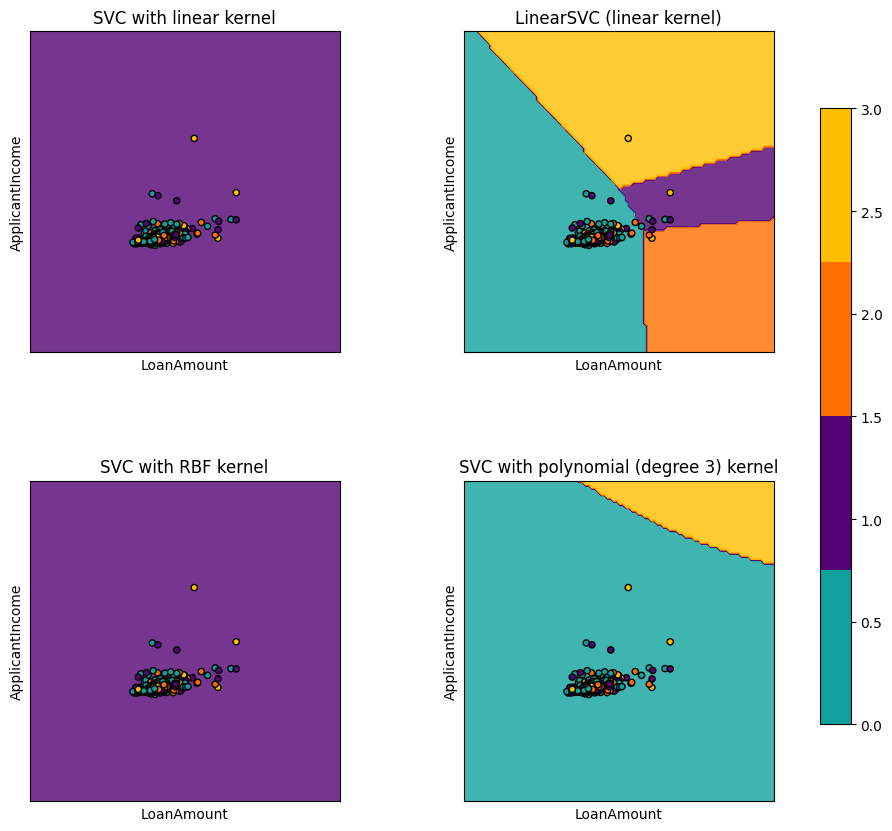

In [146]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn import svm

# Custom color palette
custom_palette = ['#10A19D', '#540375', '#FF7000', '#FFBF00']
cmap = ListedColormap(custom_palette)

# Feature columns and target column
feature_columns = ['LoanAmount', 'ApplicantIncome']
target_column = 'Dependents'

# Extract features and target
X = loan_dta[feature_columns].values
y = loan_dta[target_column].values

# If y is categorical, convert it to numerical
if y.dtype.kind == 'O':  # If y is an object (i.e., categorical)
    y = pd.factorize(y)[0]  # Convert to numerical

# Create an instance of SVM models
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

# Fit models
models = [clf.fit(X, y) for clf in models]

# Titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set up a 2x2 grid for plotting
fig, sub = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Ensure X has exactly 2 features for plotting
if X.shape[1] != 2:
    raise ValueError("The dataset must have exactly 2 features for this plotting code.")

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=cmap,  # Use the custom color palette
        alpha=0.8,
        ax=ax,
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
    )
    scatter = ax.scatter(X0, X1, c=y, cmap=cmap, s=20, edgecolors="k")  # Use the custom color palette
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Add colorbar
fig.colorbar(scatter, ax=sub.flatten(), shrink=0.8)

plt.show()